## Author: Technocolabs Sofwares
## Credit: Mr. Yasin Shah
## Programmed: Spotify Feature Extraction Using Spotify Client

<hr>

<center> <h2> Task Done by: Mahmoud Yaser Salman </h2><br>
    <h3><a href="https://github.com/mahmoud1yaser"> GitHub Profile </a> </h3>
</center>

<hr>

# Table of Content (ToC)

[0. Importing Packages](#0)<br>
[1. Loading & Combining the Data](#1)<br>
____[1.2 Extracting Additional Features Using Spotify API  ](#1.2)<br>
________[1.2.1 Feature Extraction Code](#1.2.1)<br>
[2. Data Exploration](#2)<br>
[3. Data Cleaning](#3)<br>
____[3.1 Changing Columns Dtype](#3.1)<br>
[4. Exploratory Data Analysis (EDA)](#4)<br>
____[4.1 Uni-variante EDA](#4.1)<br>
________[4.1.1 Histograms/Boxplots of Numerical Columns](#4.1.1)<br>
________[4.1.2 Top 50 Artists](#4.1.2)<br>
________[4.1.3 Top 50 Albums](#4.1.3)<br>
________[4.1.4 Top 50 Tracks](#4.1.4)<br>
________[4.1.5 Collaborative Tracks](#4.1.5)<br>
____[4.2 Bi-variante EDA](#4.2)<br>
________[4.2.1 Pair Plots for all Numerical Columns](#4.2.1)<br>
________[4.2.2 Number Albums vs. Number Followers](#4.2.2)<br>
____[4.3 Multi-variante EDA](#4.3)<br>
________[4.3.1 3D Scatter Plot for # Artists vs. # Albums vs. # Tracks](#4.3.1)<br>
________[4.3.2 Number of Edits vs. Duration in ms Grouped by the Collaborative Feature](#4.3.2)<br>
________[4.3.3 Line Plot for Number Albums vs. Number Artists for Collaborative & Personal Albums](#4.3.3)<br>
[5. Feature Engineering](#5)<br>
____[5.2 Transfrom Data to Handle Skewness](#5.2)<br>
________[5.2.1 Apply Log Transformation For Right-Skewed Features and Power Transformation For Left-Skewed Features](#5.2.1)<br>
____[5.3 Apply Tukey’s box plot method to detect and winsorize outliers](#5.3)<br>
____[5.4 Feature Scaling](#5.4)<br>
____[5.5 Create New Features by Features Interaction](#5.5)<br>
____[5.6 Drop Useless Features](#5.6)<br>
____[5.7 Use PCA for Dimensionality Reduction](#5.7)<br>


<hr>

<h2> 0. Importing Packages </h2><a name="0"></a>

In [1]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn




pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook

<hr>

## 1. Loading & Extracting the Data <a name="1"></a>

In [2]:
DATASETS_PATH = 'A:\Spotify Data\JsonData'

In [3]:

FIELDS = ['pid', 'name', 'description', 'modified_at', 'num_artists',
         'num_albums', 'num_tracks', 'num_followers', 'num_edits',
         'duration_ms', 'collaborative']

# Concatenate all json files into a single dataframe and flaten the json object tracks in the original dataset.
for i, dataset in enumerate(glob.glob(DATASETS_PATH+'/*.json')):

    data = json.load(open(dataset), encoding="utf-8")
    
    df_ = pd.json_normalize(data['playlists'], 'tracks', FIELDS, record_prefix= 'track_', errors='ignore')
        
    if i == 0:
        df = df_.copy()
    else:
        df = pd.concat([df, df_], axis=0, ignore_index=True)

In [4]:
df

,track_pos,track_artist_name,track_track_uri,track_artist_uri,track_track_name,track_album_uri,track_duration_ms,track_album_name,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,duration_ms,collaborative
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266381,92,Alanis Morissette,spotify:track:7c1iI6dwdCpHGYT8DGEfab,spotify:artist:6ogn9necmbUdCppmNnGOdi,Uninvited,spotify:album:4N7LuZYpstQrtcHIoOKzqg,276200,The Collection,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266382,93,Alanis Morissette,spotify:track:4l7YIni9bAiGwWMqK5wvgV,spotify:artist:6ogn9necmbUdCppmNnGOdi,You Learn - 2015 Remastered,spotify:album:5Ap3F8CxjjsQKZGASDcHNA,239640,Jagged Little Pill (Remastered),3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266383,94,Alanis Morissette,spotify:track:2LVxvGhl2U5p2ql2ujc6vZ,spotify:artist:6ogn9necmbUdCppmNnGOdi,Hands Clean,spotify:album:0kKfmdca8GY7bDWFWtY801,269400,Under Rug Swept,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266384,95,Andrew McMahon in the Wilderness,spotify:track:2Kgjd9G808FhUDRhS2gidG,spotify:artist:716ZwtZBmwROBXcFmCzfdM,Cecilia And The Satellite,spotify:album:1FtH1WWaGL1OvhTMAMw5XI,223879,Andrew McMahon In The Wilderness,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false


In [5]:
# Edit columns name to be more descriptive and remove track prefix from them

TRACKS_FIELDS = ['track_pos', 'track_artist_name', 'track_track_uri',
                'track_artist_uri', 'track_track_name', 'track_album_uri',
                'track_duration_ms', 'track_album_name']

df = df.reindex(columns = FIELDS+TRACKS_FIELDS)

df.rename(columns={'duration_ms': 'playlist_duration_ms'}, inplace=True)

for column in df.columns:
    if column in TRACKS_FIELDS:
        df.rename(columns={column : column.split('_', maxsplit=1)[1]}, inplace=True)

df.to_csv(os.path.join(DATASETS_PATH, 'initial_dataset.csv'), index=False)
df

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266381,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,92,Alanis Morissette,spotify:track:7c1iI6dwdCpHGYT8DGEfab,spotify:artist:6ogn9necmbUdCppmNnGOdi,Uninvited,spotify:album:4N7LuZYpstQrtcHIoOKzqg,276200,The Collection
266382,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,93,Alanis Morissette,spotify:track:4l7YIni9bAiGwWMqK5wvgV,spotify:artist:6ogn9necmbUdCppmNnGOdi,You Learn - 2015 Remastered,spotify:album:5Ap3F8CxjjsQKZGASDcHNA,239640,Jagged Little Pill (Remastered)
266383,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,94,Alanis Morissette,spotify:track:2LVxvGhl2U5p2ql2ujc6vZ,spotify:artist:6ogn9necmbUdCppmNnGOdi,Hands Clean,spotify:album:0kKfmdca8GY7bDWFWtY801,269400,Under Rug Swept
266384,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,95,Andrew McMahon in the Wilderness,spotify:track:2Kgjd9G808FhUDRhS2gidG,spotify:artist:716ZwtZBmwROBXcFmCzfdM,Cecilia And The Satellite,spotify:album:1FtH1WWaGL1OvhTMAMw5XI,223879,Andrew McMahon In The Wilderness


In [6]:
df = pd.read_csv(os.path.join(DATASETS_PATH, 'initial_dataset.csv'))
df

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266381,3999,other,NaN,1420848000,17,56,97,1,9,22548683,False,92,Alanis Morissette,spotify:track:7c1iI6dwdCpHGYT8DGEfab,spotify:artist:6ogn9necmbUdCppmNnGOdi,Uninvited,spotify:album:4N7LuZYpstQrtcHIoOKzqg,276200,The Collection
266382,3999,other,NaN,1420848000,17,56,97,1,9,22548683,False,93,Alanis Morissette,spotify:track:4l7YIni9bAiGwWMqK5wvgV,spotify:artist:6ogn9necmbUdCppmNnGOdi,You Learn - 2015 Remastered,spotify:album:5Ap3F8CxjjsQKZGASDcHNA,239640,Jagged Little Pill (Remastered)
266383,3999,other,NaN,1420848000,17,56,97,1,9,22548683,False,94,Alanis Morissette,spotify:track:2LVxvGhl2U5p2ql2ujc6vZ,spotify:artist:6ogn9necmbUdCppmNnGOdi,Hands Clean,spotify:album:0kKfmdca8GY7bDWFWtY801,269400,Under Rug Swept
266384,3999,other,NaN,1420848000,17,56,97,1,9,22548683,False,95,Andrew McMahon in the Wilderness,spotify:track:2Kgjd9G808FhUDRhS2gidG,spotify:artist:716ZwtZBmwROBXcFmCzfdM,Cecilia And The Satellite,spotify:album:1FtH1WWaGL1OvhTMAMw5XI,223879,Andrew McMahon In The Wilderness


## 1.2 Extracting Additional Features Using Spotify API  <a name="1.2"></a>

All is commented because we already created our csv files after 6 continous hours of downloading our song features from spotify API

In [7]:
# client_id = "your_app_id"
# client_secret = "your_app_secret_key"

# client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
# sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [8]:
# df.track_uri.head()

In [9]:
# df["track_uri"] = df["track_uri"].apply(lambda x: str(x).split(":")[-1])
# df["track_uri"].head()

In [10]:
# all_uri = df.track_uri.unique().tolist()
# df.track_uri.nunique()

## 1.2.1 Feature Extraction Code<a name="1.2.1"></a>

In [11]:
# p1, p2, p3, p4, p5 = all_uri[:20000], all_uri[2000:40000], all_uri[40000:60000], all_uri[60000:80000], all_uri[80000:]
# api_features = []

# for uri in tqdm(p1):
#     try:
#         api_features.append(sp.audio_features(uri)[0])
#     except:
#         pass

In [12]:
# for uri in tqdm(p2):
#     try:
#         api_features.append(sp.audio_features(uri)[0])
#     except:
#         pass

In [13]:
# for uri in tqdm(p3):
#     try:
#         api_features.append(sp.audio_features(uri)[0])
#     except:
#         pass

In [14]:
# for uri in tqdm(p4):
#     try:
#         api_features.append(sp.audio_features(uri)[0])
#     except:
#         pass

In [15]:
# for uri in tqdm(p5):
#     try:
#         api_features.append(sp.audio_features(uri)[0])
#     except:
#         pass

In [16]:
# df_api = pd.DataFrame(api_features)
# df_api.drop_duplicates(inplace=True, ignore_index=True)

# # Duration column is duplicated with the initial dataset, so we drop it.
# df_api.drop(columns={"duration_ms"}, inplace=True)

# df_api.to_csv(os.path.join(DATASETS_PATH, 'api_dataset.csv'), index=False)
# df_api

## 1.3 Combining the data  <a name="1.3"></a>

In [17]:
df_api = pd.read_csv(os.path.join(DATASETS_PATH, 'api_dataset.csv'))
df_api

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,0.77,0.84,5,-3.91,0,0.11,2.49e-02,2.50e-02,0.24,0.92,143.04,audio_features,6I9VzXrHxO9rA9A5euc8Ak,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,4
2,0.66,0.76,2,-6.58,0,0.21,2.38e-03,0.00e+00,0.06,0.70,99.26,audio_features,0WqIKmW4BTrj3eJFmnCKMv,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,4
3,0.89,0.71,4,-6.05,0,0.14,2.01e-01,2.34e-04,0.05,0.82,100.97,audio_features,1AWQoqb9bSvzTjaLralEkT,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,4
4,0.85,0.61,0,-4.60,1,0.07,5.61e-02,0.00e+00,0.31,0.65,94.76,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93118,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,audio_features,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4
93119,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,audio_features,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4
93120,0.71,0.68,11,-8.75,1,0.05,5.24e-02,8.97e-02,0.06,0.78,92.40,audio_features,2JtJruenT9hgZE4cnMtBnt,spotify:track:2JtJruenT9hgZE4cnMtBnt,https://api.spotify.com/v1/tracks/2JtJruenT9hg...,https://api.spotify.com/v1/audio-analysis/2JtJ...,4
93121,0.72,0.69,9,-7.42,1,0.04,1.51e-01,3.69e-01,0.08,0.60,94.02,audio_features,5qgBvugGSAnKWCpWAiwusi,spotify:track:5qgBvugGSAnKWCpWAiwusi,https://api.spotify.com/v1/tracks/5qgBvugGSAnK...,https://api.spotify.com/v1/audio-analysis/5qgB...,4


In [18]:
df = pd.merge(df, df_api, left_on='track_uri', right_on='uri', )
df.head(5)

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,False,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,False,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,False,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,False,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4


<hr>

## 2. Data Exploration<a name="2"></a>


In [19]:
df.shape

(266363, 36)

We observe we have up to 266,363 record and 53 features.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266363 entries, 0 to 266362
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pid                   266363 non-null  int64  
 1   name                  266363 non-null  object 
 2   description           5333 non-null    object 
 3   modified_at           266363 non-null  int64  
 4   num_artists           266363 non-null  int64  
 5   num_albums            266363 non-null  int64  
 6   num_tracks            266363 non-null  int64  
 7   num_followers         266363 non-null  int64  
 8   num_edits             266363 non-null  int64  
 9   playlist_duration_ms  266363 non-null  int64  
 10  collaborative         266363 non-null  bool   
 11  pos                   266363 non-null  int64  
 12  artist_name           266363 non-null  object 
 13  track_uri             266363 non-null  object 
 14  artist_uri            266363 non-null  object 
 15  

In [21]:
df.select_dtypes('object').columns

Index(['name', 'description', 'artist_name', 'track_uri', 'artist_uri',
       'track_name', 'album_uri', 'album_name', 'type', 'id', 'uri',
       'track_href', 'analysis_url'],
      dtype='object')

In [22]:
df.select_dtypes('bool').columns

Index(['collaborative'], dtype='object')

In [23]:
df.select_dtypes('int64').columns

Index(['pid', 'modified_at', 'num_artists', 'num_albums', 'num_tracks',
       'num_followers', 'num_edits', 'playlist_duration_ms', 'pos',
       'duration_ms', 'key', 'mode', 'time_signature'],
      dtype='object')

In [24]:
df.select_dtypes('float64').columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [25]:
df.nunique()

pid                      4000
name                     2811
description                76
modified_at              1197
num_artists               164
num_albums                200
num_tracks                241
num_followers              30
num_edits                 124
playlist_duration_ms     4000
collaborative               2
pos                       248
artist_name             22050
track_uri               93123
artist_uri              22162
track_name              75821
album_uri               47770
duration_ms             43280
album_name              41545
danceability             1069
energy                   1848
key                        12
loudness                17372
mode                        2
speechiness              1482
acousticness             4601
instrumentalness         5373
liveness                 1720
valence                  1646
tempo                   49385
type                        1
id                      93123
uri                     93123
track_href

- We observe here that track features like type, mode, collaborative, key, time_signature have a few unique values 
- for `type` feature, it only have 1 value which does not convey any information so we can drop `type` column
- for `mode` and `collaborative` features, they each have 2 values. So, they might be encoded as `0` and `1`
- for `time_signature`, it have 5 values. So, we might encode it as category using one hot encoding
    - for `key` column we might do the same 

<hr>

## 3. Data Cleaning<a name="3"></a>

## 3.1 Changing Columns Dtype<a name="3.1"></a>

In [26]:
df_modified = df.drop('type', axis=1)

print(f"mode values are: {df_modified['mode'].unique()}\n")
print(f"collaborative values are: {df_modified['collaborative'].unique()}\n")

mode values are: [0 1]

collaborative values are: [False  True]



collaborative column has boolean values and will be encoded as 0: false and 1: True <br>
mode column is already encoded as category

In [27]:
df_modified['collaborative'] = df_modified['collaborative'].replace(False,0)
df_modified['collaborative'] = df_modified['collaborative'].replace(True,1)
df_modified['collaborative'].unique()

array([0, 1], dtype=int64)

In [28]:
print(f"time_signature values are: {df_modified['time_signature'].unique()}\n")
print(f"key values are: {df_modified['key'].unique()}\n")

time_signature values are: [4 3 1 5 0]

key values are: [ 4  5  2  0 10  9  8  1  7 11  3  6]



time_signature and key columns are already encoded as categories 

<hr>

## 4. Exploratory Data Analysis (EDA)<a name="4"></a>


## 4.1 Uni-variante EDA<a name="4.1"></a>

## 4.1.1 Histograms/Boxplots of Numerical Columns<a name="4.1.1"></a>

In [29]:
numerical_features = (df_modified.dtypes == 'int64') | (df_modified.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_modified.columns[i])
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

<ipython-input-30-3cb2513dcc4e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_modified[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

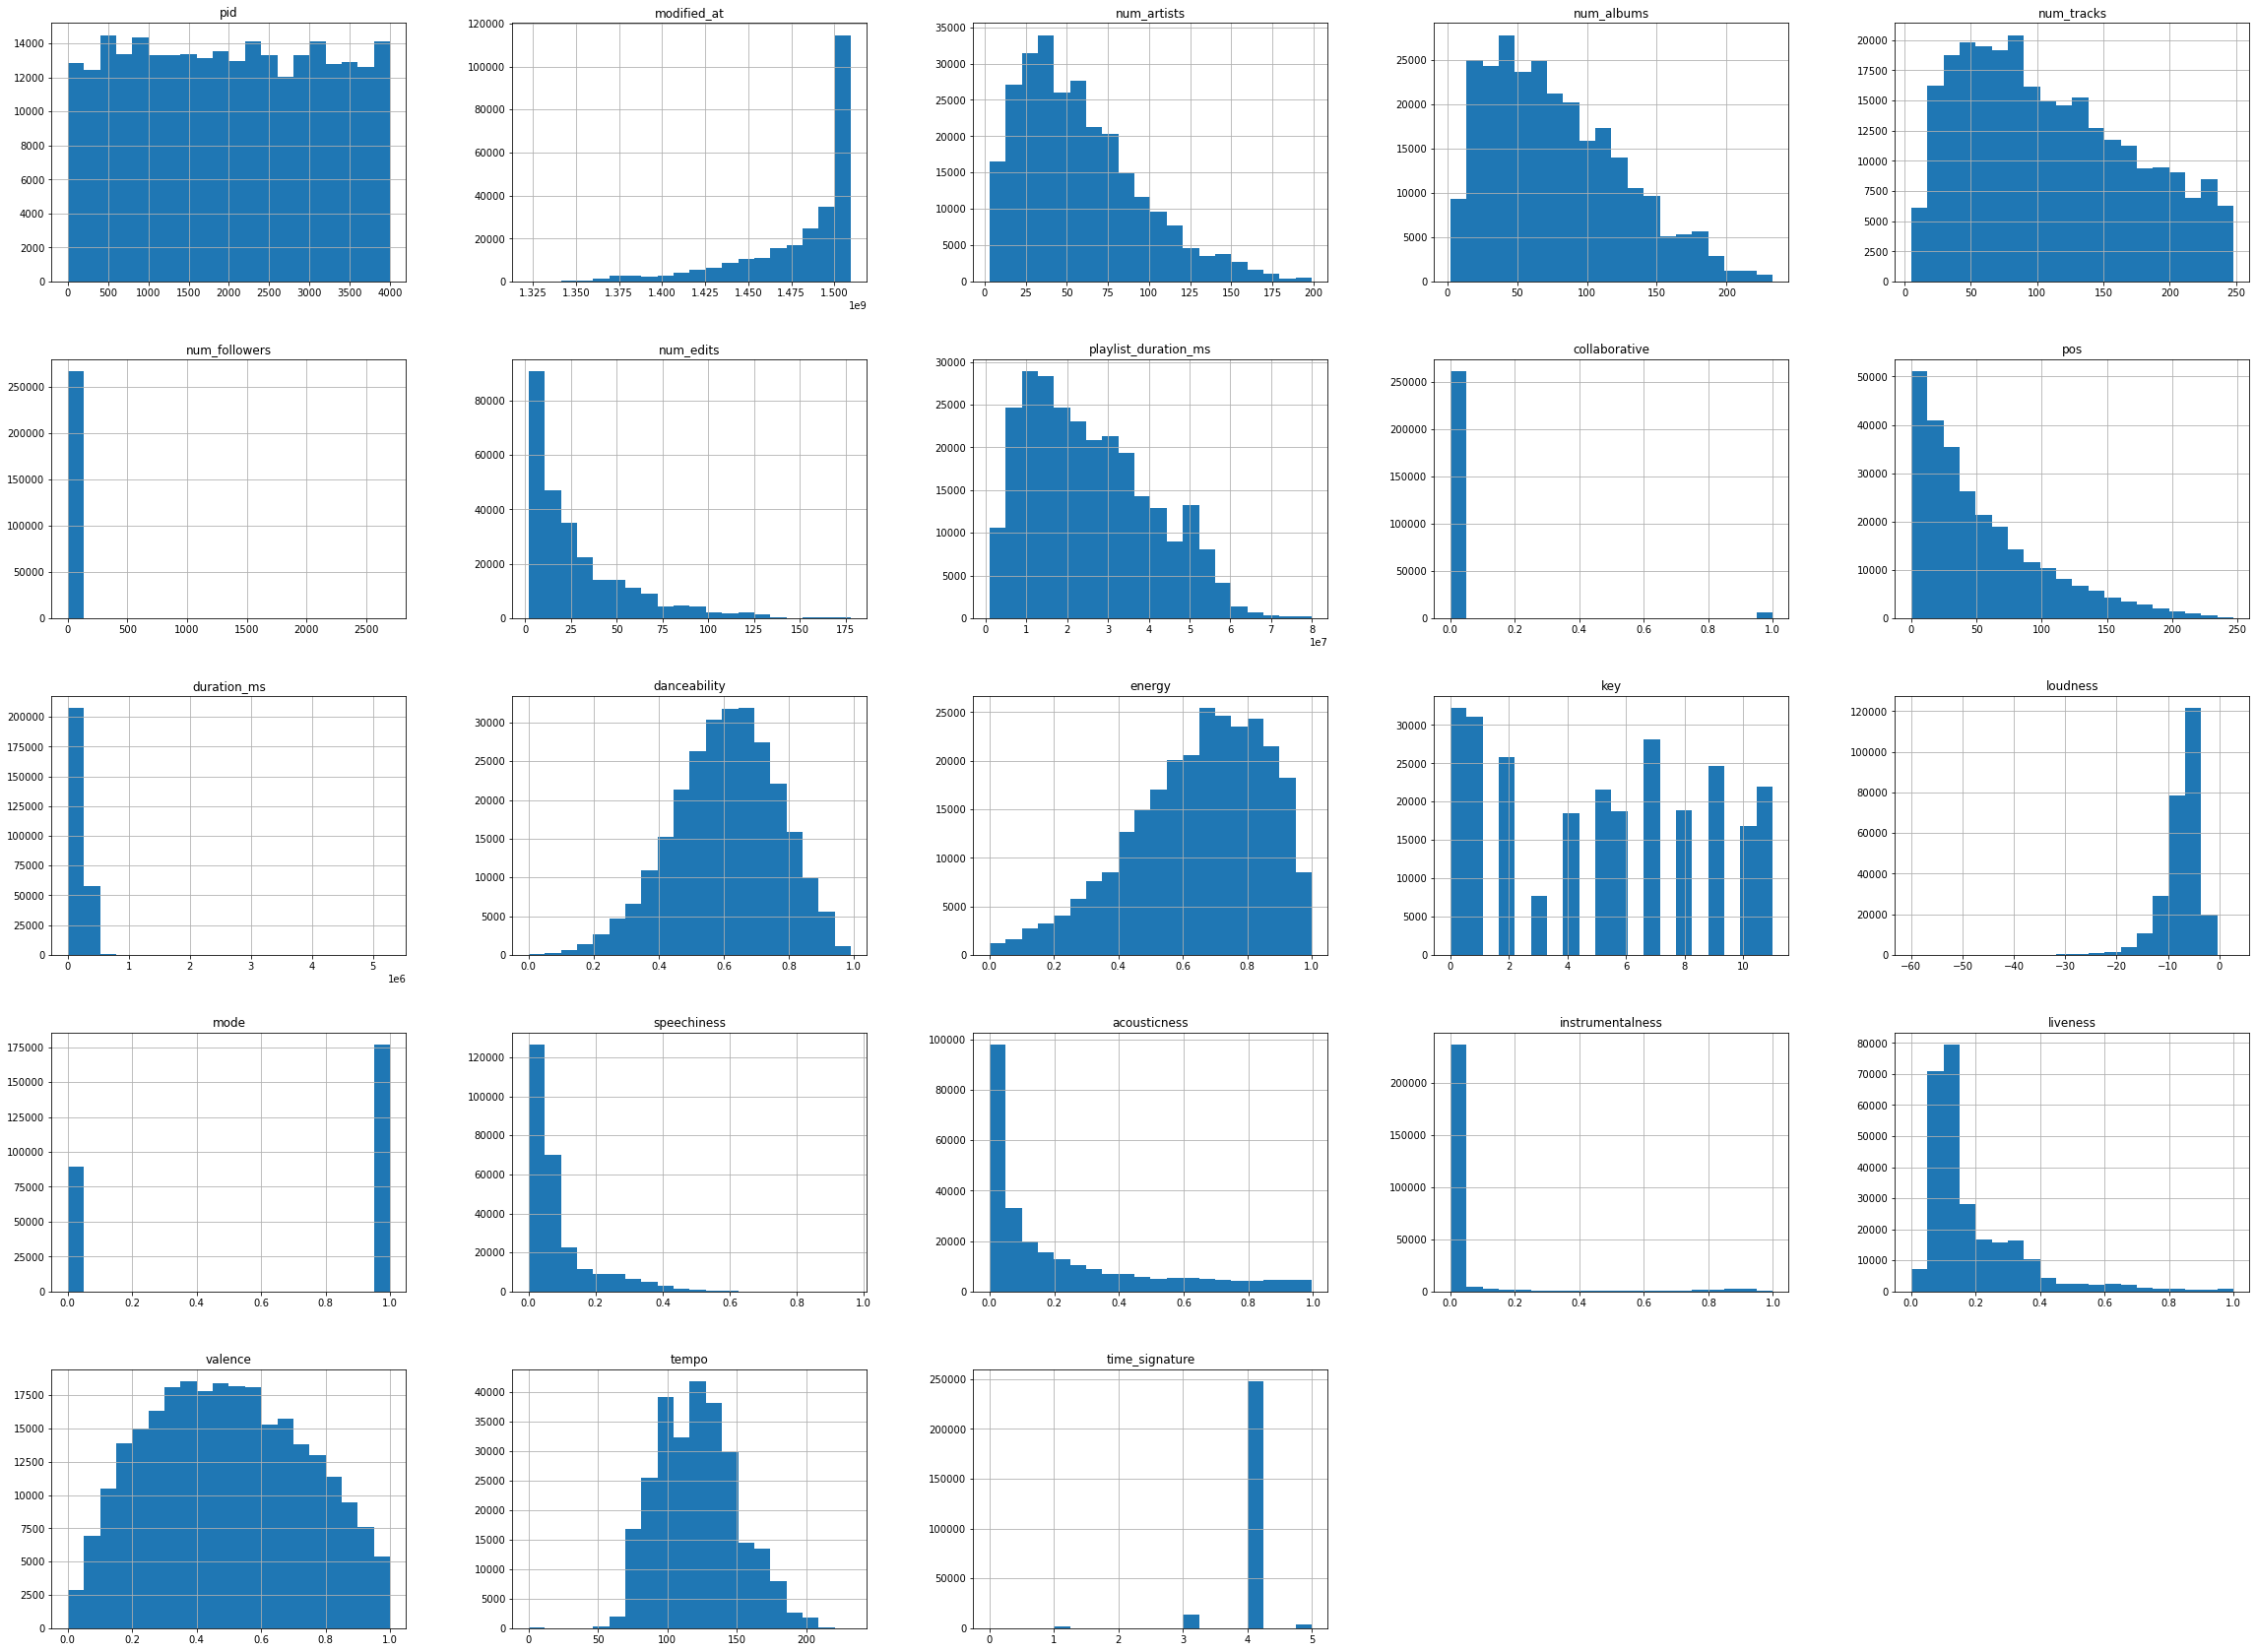

In [30]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_modified[numerical_columns].hist(ax = ax, bins=20)

## 4.1.2 Top 50 Artists<a name="4.1.2"></a>

In [31]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure,spotify:track:2JtJruenT9hgZE4cnMtBnt,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Close To Me - Closest Mix,spotify:album:7atCFN41kB5N0zivS2Pwtd,261560,Mixed Up

In [66]:
df_modified["playlist_followers_artist"] = df_modified.groupby("artist_name")["num_followers"].transform("count")
df_modified["playlist_followers_artist"]

df1 = df_modified.sort_values("playlist_followers_artist", ascending = False)
df1["artist_name"].head(40000).nunique()

50

In [67]:
df1["artist_name"].head(40000).unique()

array(['Drake', 'Kanye West', 'The Weeknd', 'Kendrick Lamar', 'Rihanna',
       'Eminem', 'Ed Sheeran', 'Beyoncé', 'Future', 'J. Cole',
       'The Chainsmokers', 'Twenty One Pilots', 'Justin Bieber',
       'Chris Brown', 'Lil Wayne', 'Luke Bryan', 'Lil Uzi Vert',
       'John Mayer', 'Calvin Harris', 'Maroon 5', 'Post Malone',
       'Big Sean', 'Florida Georgia Line', 'Bruno Mars', 'Kenny Chesney',
       'Coldplay', 'G-Eazy', 'The Beatles', 'Zac Brown Band',
       'Childish Gambino', 'Migos', 'Logic', 'Imagine Dragons', 'JAY Z',
       'Wiz Khalifa', 'Rae Sremmurd', 'Jason Aldean', 'Fall Out Boy',
       'Tim McGraw', 'Usher', 'Nicki Minaj', 'Panic! At The Disco',
       'Ariana Grande', 'Chance The Rapper', 'Fetty Wap', 'Sam Hunt',
       'Michael Bublé', 'DJ Khaled', 'Red Hot Chili Peppers',
       'Thomas Rhett'], dtype=object)

## 4.1.3 Top 50 Albums<a name="4.1.3"></a>

In [34]:
df_modified["playlist_followers_album"] = df_modified.groupby("album_name")["num_followers"].transform("count")
df_modified["playlist_followers_album"]

df2 = df_modified.sort_values("playlist_followers_album", ascending = False)
df2["album_name"].head(18500).nunique()

50

In [35]:
df2["album_name"].head(18500).unique()

array(['Views', 'Stoney', 'Greatest Hits', 'Beauty Behind The Madness',
       'DAMN.', 'Coloring Book', 'More Life', 'American Teen',
       'Blurryface', 'Starboy', 'The Life Of Pablo', 'Culture',
       '2014 Forest Hills Drive', 'Original Album Classics',
       "If You're Reading This It's Too Late", 'Take Care', 'Purpose',
       '÷', 'Nothing Was The Same', 'Montevallo', 'x', 'ANTI',
       'Fetty Wap', 'BEYONCÉ [Platinum Edition]',
       'good kid, m.A.A.d city', 'Birds In The Trap Sing McKnight',
       'Encore', 'Hozier', 'The Pinkprint', 'BADLANDS',
       'The Chainsmokers- Japan Special Edition', 'T R A P S O U L',
       'What A Time To Be Alive', "When It's Dark Out", 'Night Visions',
       'Christmas', 'SremmLife 2', 'In The Lonely Hour',
       'Dark Sky Paradise', 'SremmLife', 'Cloud Nine', 'Crash My Party',
       'I Decided.', 'Recovery', 'Dream Your Life Away',
       "Here's To The Good Times", 'Tangled Up', 'Luv Is Rage 2',
       "There's Really A Wolf", 'LONG

## 4.1.4 Top 50 Tracks<a name="4.1.4"></a>

In [36]:
df_modified["playlist_followers_track"] = df_modified.groupby("track_name")["num_followers"].transform("count")
df_modified["playlist_followers_track"]

df2 = df_modified.sort_values("playlist_followers_track", ascending = False)
df2["track_name"].head(6790).nunique()

50

In [37]:
df2["track_name"].head(6790).unique()

array(['Closer', 'Home', 'Ride', 'HUMBLE.', 'Roses', 'One Dance',
       'Let Me Love You', 'Caroline', 'Congratulations',
       'Broccoli (feat. Lil Yachty)', 'Gold',
       'Bad and Boujee (feat. Lil Uzi Vert)', 'Stay', 'Panda', 'Forever',
       'White Iverson', 'Riptide', 'Sorry', 'Trap Queen', 'Down',
       "Don't Let Me Down", 'iSpy (feat. Lil Yachty)', 'Hello', 'Starboy',
       'No Role Modelz', 'T-Shirt', 'Bounce Back', 'Mercy', 'Redbone',
       'Mask Off', 'Location', "Don't", 'Jumpman', 'Blessings',
       'Shape of You', 'Unforgettable', 'goosebumps', 'Ignition - Remix',
       'Skinny Love', 'No Problem (feat. Lil Wayne & 2 Chainz)',
       'Hotline Bling', 'Lean On (feat. MØ & DJ Snake)', 'Slide',
       'Gold Digger', 'XO TOUR Llif3', 'Ni**as In Paris', 'Let It Go',
       'The Hills', 'Hurricane', "I'm the One"], dtype=object)

## 4.1.5 Collaborative Tracks<a name="4.1.5"></a>

In [38]:
df_modified[df_modified["collaborative"]==1]["track_name"]

47                                                    Toxic
97                                            Crazy In Love
168                                          Rock Your Body
182                                          Rock Your Body
206                                            It Wasn't Me
                                ...                        
265982                                    Really Don’t Care
265983                                           No Diggity
265984                                            Come Away
265985    Jackie Wilson Said (I'm in Heaven When You Smile)
265986                                              My Love
Name: track_name, Length: 5726, dtype: object

## 4.2 Bi-variante EDA<a name="4.2"></a>

## 4.2.1 Pair Plots for all Numerical Columns<a name="4.2.1"></a>

In [39]:
# sns.pairplot(df_modified[numerical_columns])

## 4.2.2 Number Albums vs. Number Followers<a name="4.2.2"></a>

<AxesSubplot:xlabel='num_albums', ylabel='num_followers'>

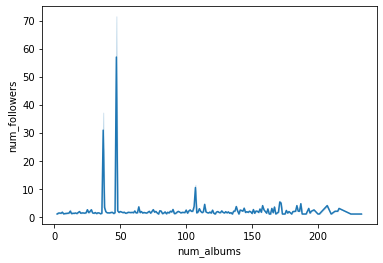

In [40]:
sns.lineplot(data=df_modified, x = "num_albums", y = "num_followers") 

## 4.3 Multi-variante EDA<a name="4.3"></a>

## 4.3.1 3D Scatter Plot for # Artists vs. # Albums vs. # Tracks<a name="4.3.1"></a>

In [41]:
df_modified.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21


<AxesSubplot:xlabel='playlist_followers_track', ylabel='playlist_followers_artist'>

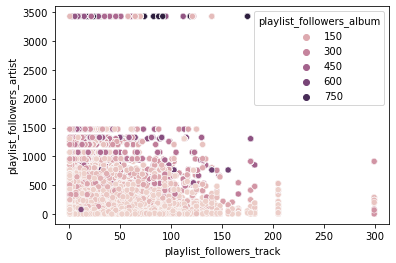

In [42]:
sns.scatterplot(data = df_modified, x = "playlist_followers_track", y = "playlist_followers_artist", hue = "playlist_followers_album" )

## 4.3.2 Number of Edits vs. Duration in ms Grouped by the Collaborative Feature<a name="4.3.2"></a>

<AxesSubplot:xlabel='num_edits', ylabel='duration_ms'>

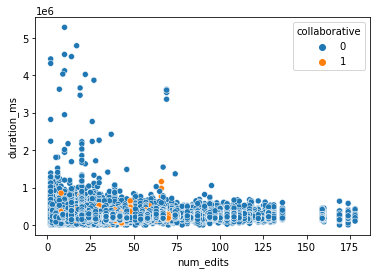

In [43]:
sns.scatterplot(data = df_modified, x = "num_edits", y = "duration_ms", hue = "collaborative" )

## 4.3.3 Line Plot for Number Albums vs. Number Artists for Collaborative & Personal Albums<a name="4.3.3"></a>

<AxesSubplot:xlabel='num_albums', ylabel='num_artists'>

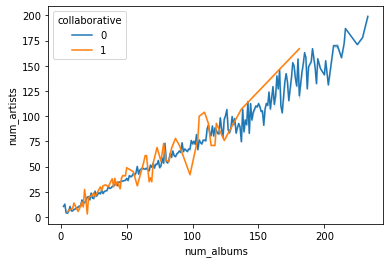

In [44]:
sns.lineplot(data = df_modified, x = "num_albums", y = "num_artists", hue = "collaborative" )

<hr>

# 5. Feature Engineering<a name="5"></a>

In [45]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

## 5.2 Transfrom Data to Handle Skewness<a name="5.2"></a>

**We can can deal with these problems as following:**
- for skewness  (to try to give them a normal distribution):
   - we can apply `log` transformation for right-skewed columns.
   - we can apply `power` transformation for left-skewed columns.
   
- for outliers:
   - use Tukey’s box plot method to detect and winsorize outliers.
   - or, use imputation

### 5.2.1 Apply Log Transformation For Right-Skewed Features and Power Transformation For Left-Skewed Features<a name="5.2.1"></a>

- Apply exponential trasformation for `modified_at`, `energy`, `loudness`, and `time_signature`.
- Apply log transformation for `num_artists`, `num_albums`, `num_tracks`, `num_followers`, `num_edits`, `playlist_duration_ms`, `duration_ms`, `key`, `speechiness`, `acousticness`, `instrumentalness`, and `liveness`.
-And the rest numeric features has almost a normal distribution or there is no need to trasfrom them like in the `pos` column

To see why would we apply log transformation on certain features and exponential transformation on another features, Lets see the positive skewed features and the negative ones.

In [46]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266363 entries, 0 to 266362
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  collaborative              266363 non-null  int64  
 11  pos                        266363 non-null  int64  
 12  artist_name                266363 non-null  object 
 13  track_uri                  26

In [47]:
positive_skewed = []
negative_skewed = []
for i in range(len(df_modified[numerical_columns].columns)):
    if (df_modified[numerical_columns].skew()[i]>0):
        positive_skewed.append(df_modified[numerical_columns].skew().index[i])
    else:
        negative_skewed.append(df_modified[numerical_columns].skew().index[i])

In [48]:
len(positive_skewed)

17

In [49]:
len(negative_skewed)

6

In [50]:
len(numerical_columns)

23

So, We analyzed all the columns into positive and negative skewed.

- We can find that these columns are those that was instructed to make logarithmic transform on them<br>
- The instructed columns were `[modified_at, energy, loudness, time_signature]`<br>
- We find that `[danceability, mode]` columns are missing. So, lets check the reason 

In [51]:
def drawHist(df, column):
    fig, ax = plt.subplots()
    df[column].hist()
    ax.set_title(f"Skew Factor: {df[column].skew()}")
    ax.set_xlabel(f"{df[column].name}")
    return 0

0

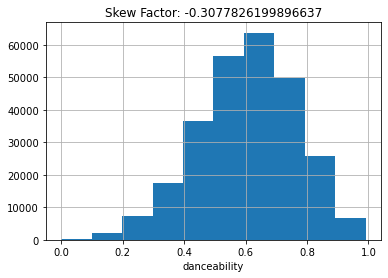

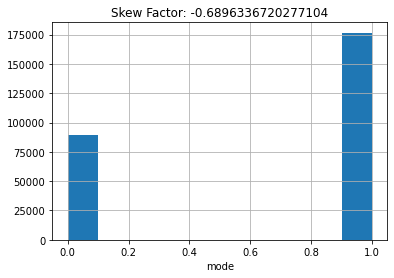

In [52]:
drawHist(df_modified, "danceability")
drawHist(df_modified, "mode")

- The reason is `danceability` column is nearly normally distributed
- `mode` column is a categorical one

In [53]:
negative_skewed = ["modified_at", "energy", "loudness", "time_signature"]

def tarnsform_columns(df, column, p):
    df1 = df.copy()
    if p == 'n':
        for i in range(len(df1[column].columns)):
            df1[df1[column].columns[i]] = np.exp(df1[df1[column].columns[i]])
    else:
            for i in range(len(df1[column].columns)):
                df1[df1[column].columns[i]] = np.log(((df1[df1[column].columns[i]])+1))
    return df1

0

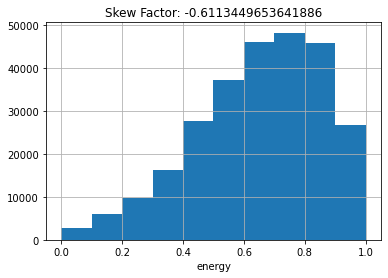

In [54]:
drawHist(df_modified, negative_skewed[1])

In [55]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, negative_skewed, 'n')
df_transformed.head()

C:\Users\mahmo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,inf,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
1,123,w o r k o u t,NaN,inf,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
2,218,party playlist,NaN,inf,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
3,342,Dance mix,NaN,inf,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
4,382,spin,NaN,inf,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21


0

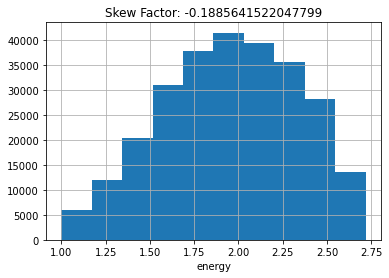

In [56]:
drawHist(df_transformed, negative_skewed[1])

0

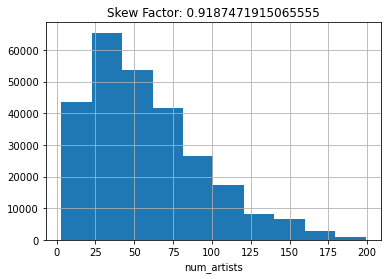

In [57]:
drawHist(df_transformed, positive_skewed[1])

In [58]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, positive_skewed, 'p')
df_transformed.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,4.82,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21


0

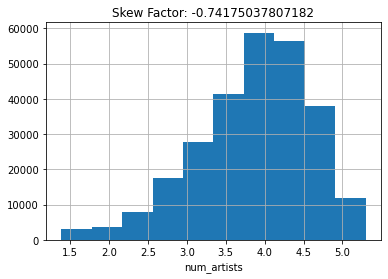

In [59]:
drawHist(df_transformed, positive_skewed[1])

Before Transform Distribution

<ipython-input-60-3cb2513dcc4e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_modified[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

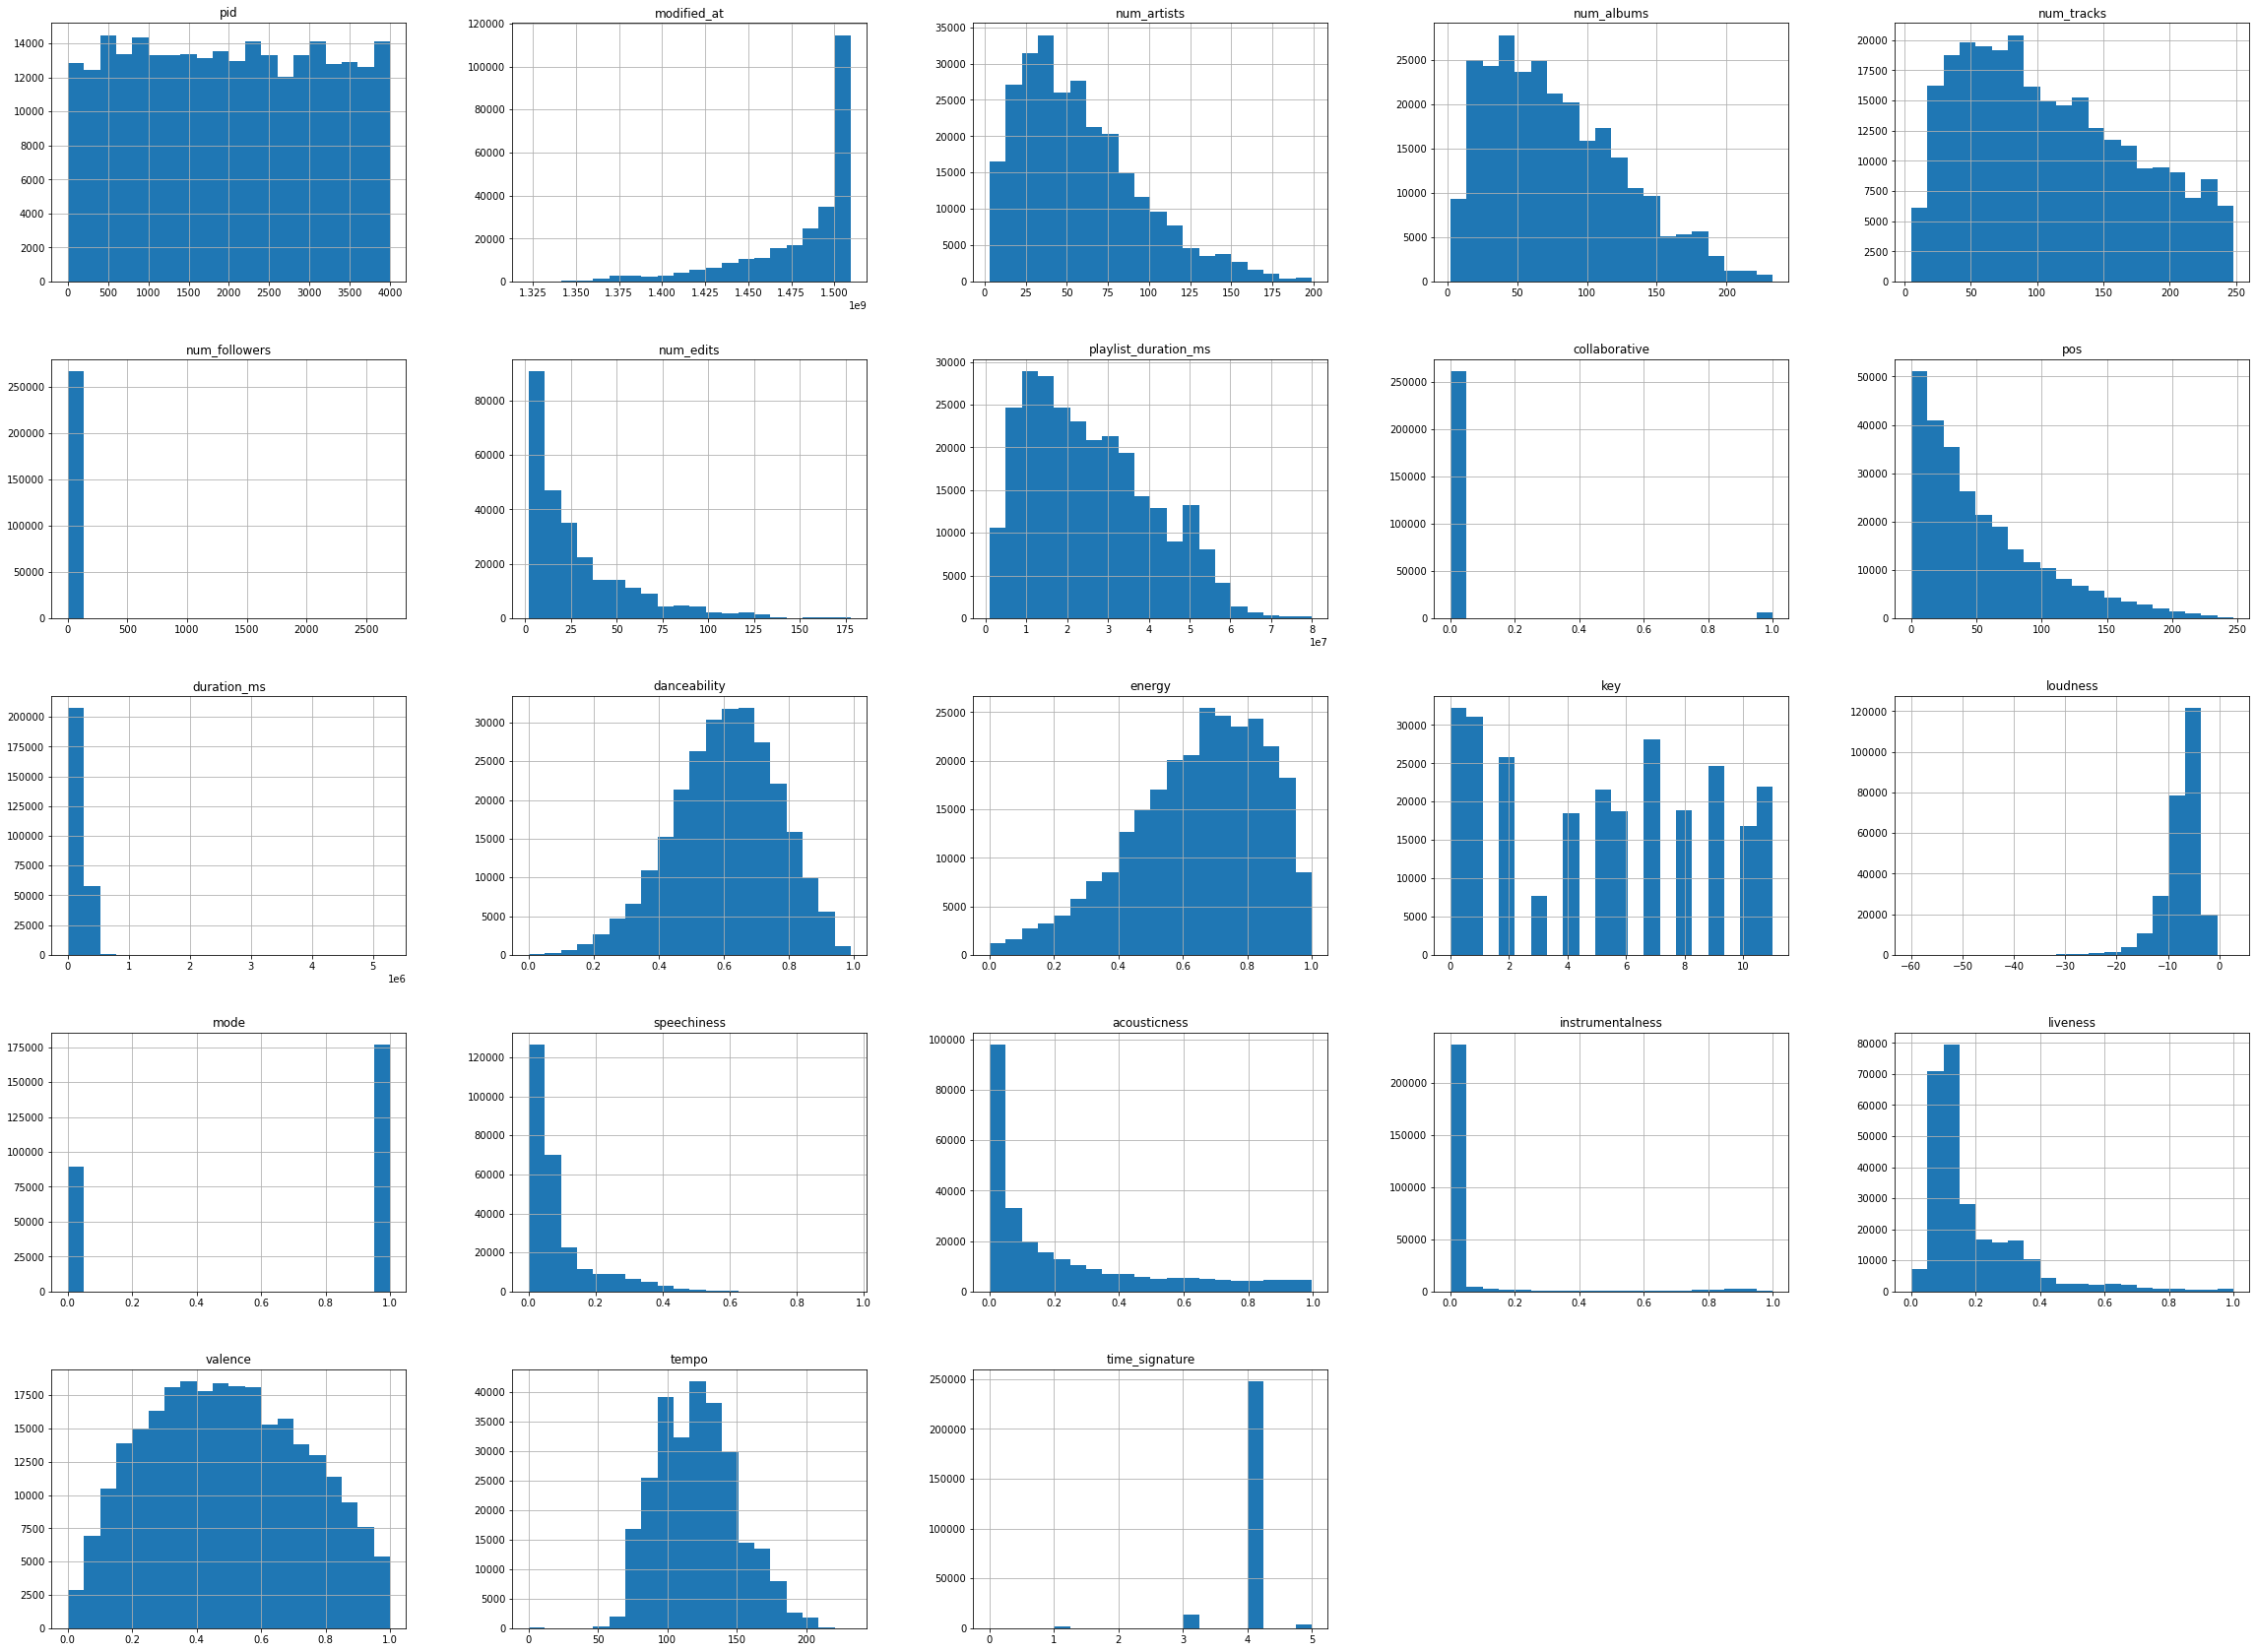

In [60]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_modified[numerical_columns].hist(ax = ax, bins=20)

After Transform Distribution

<ipython-input-61-26c25c6e3332>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_transformed[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

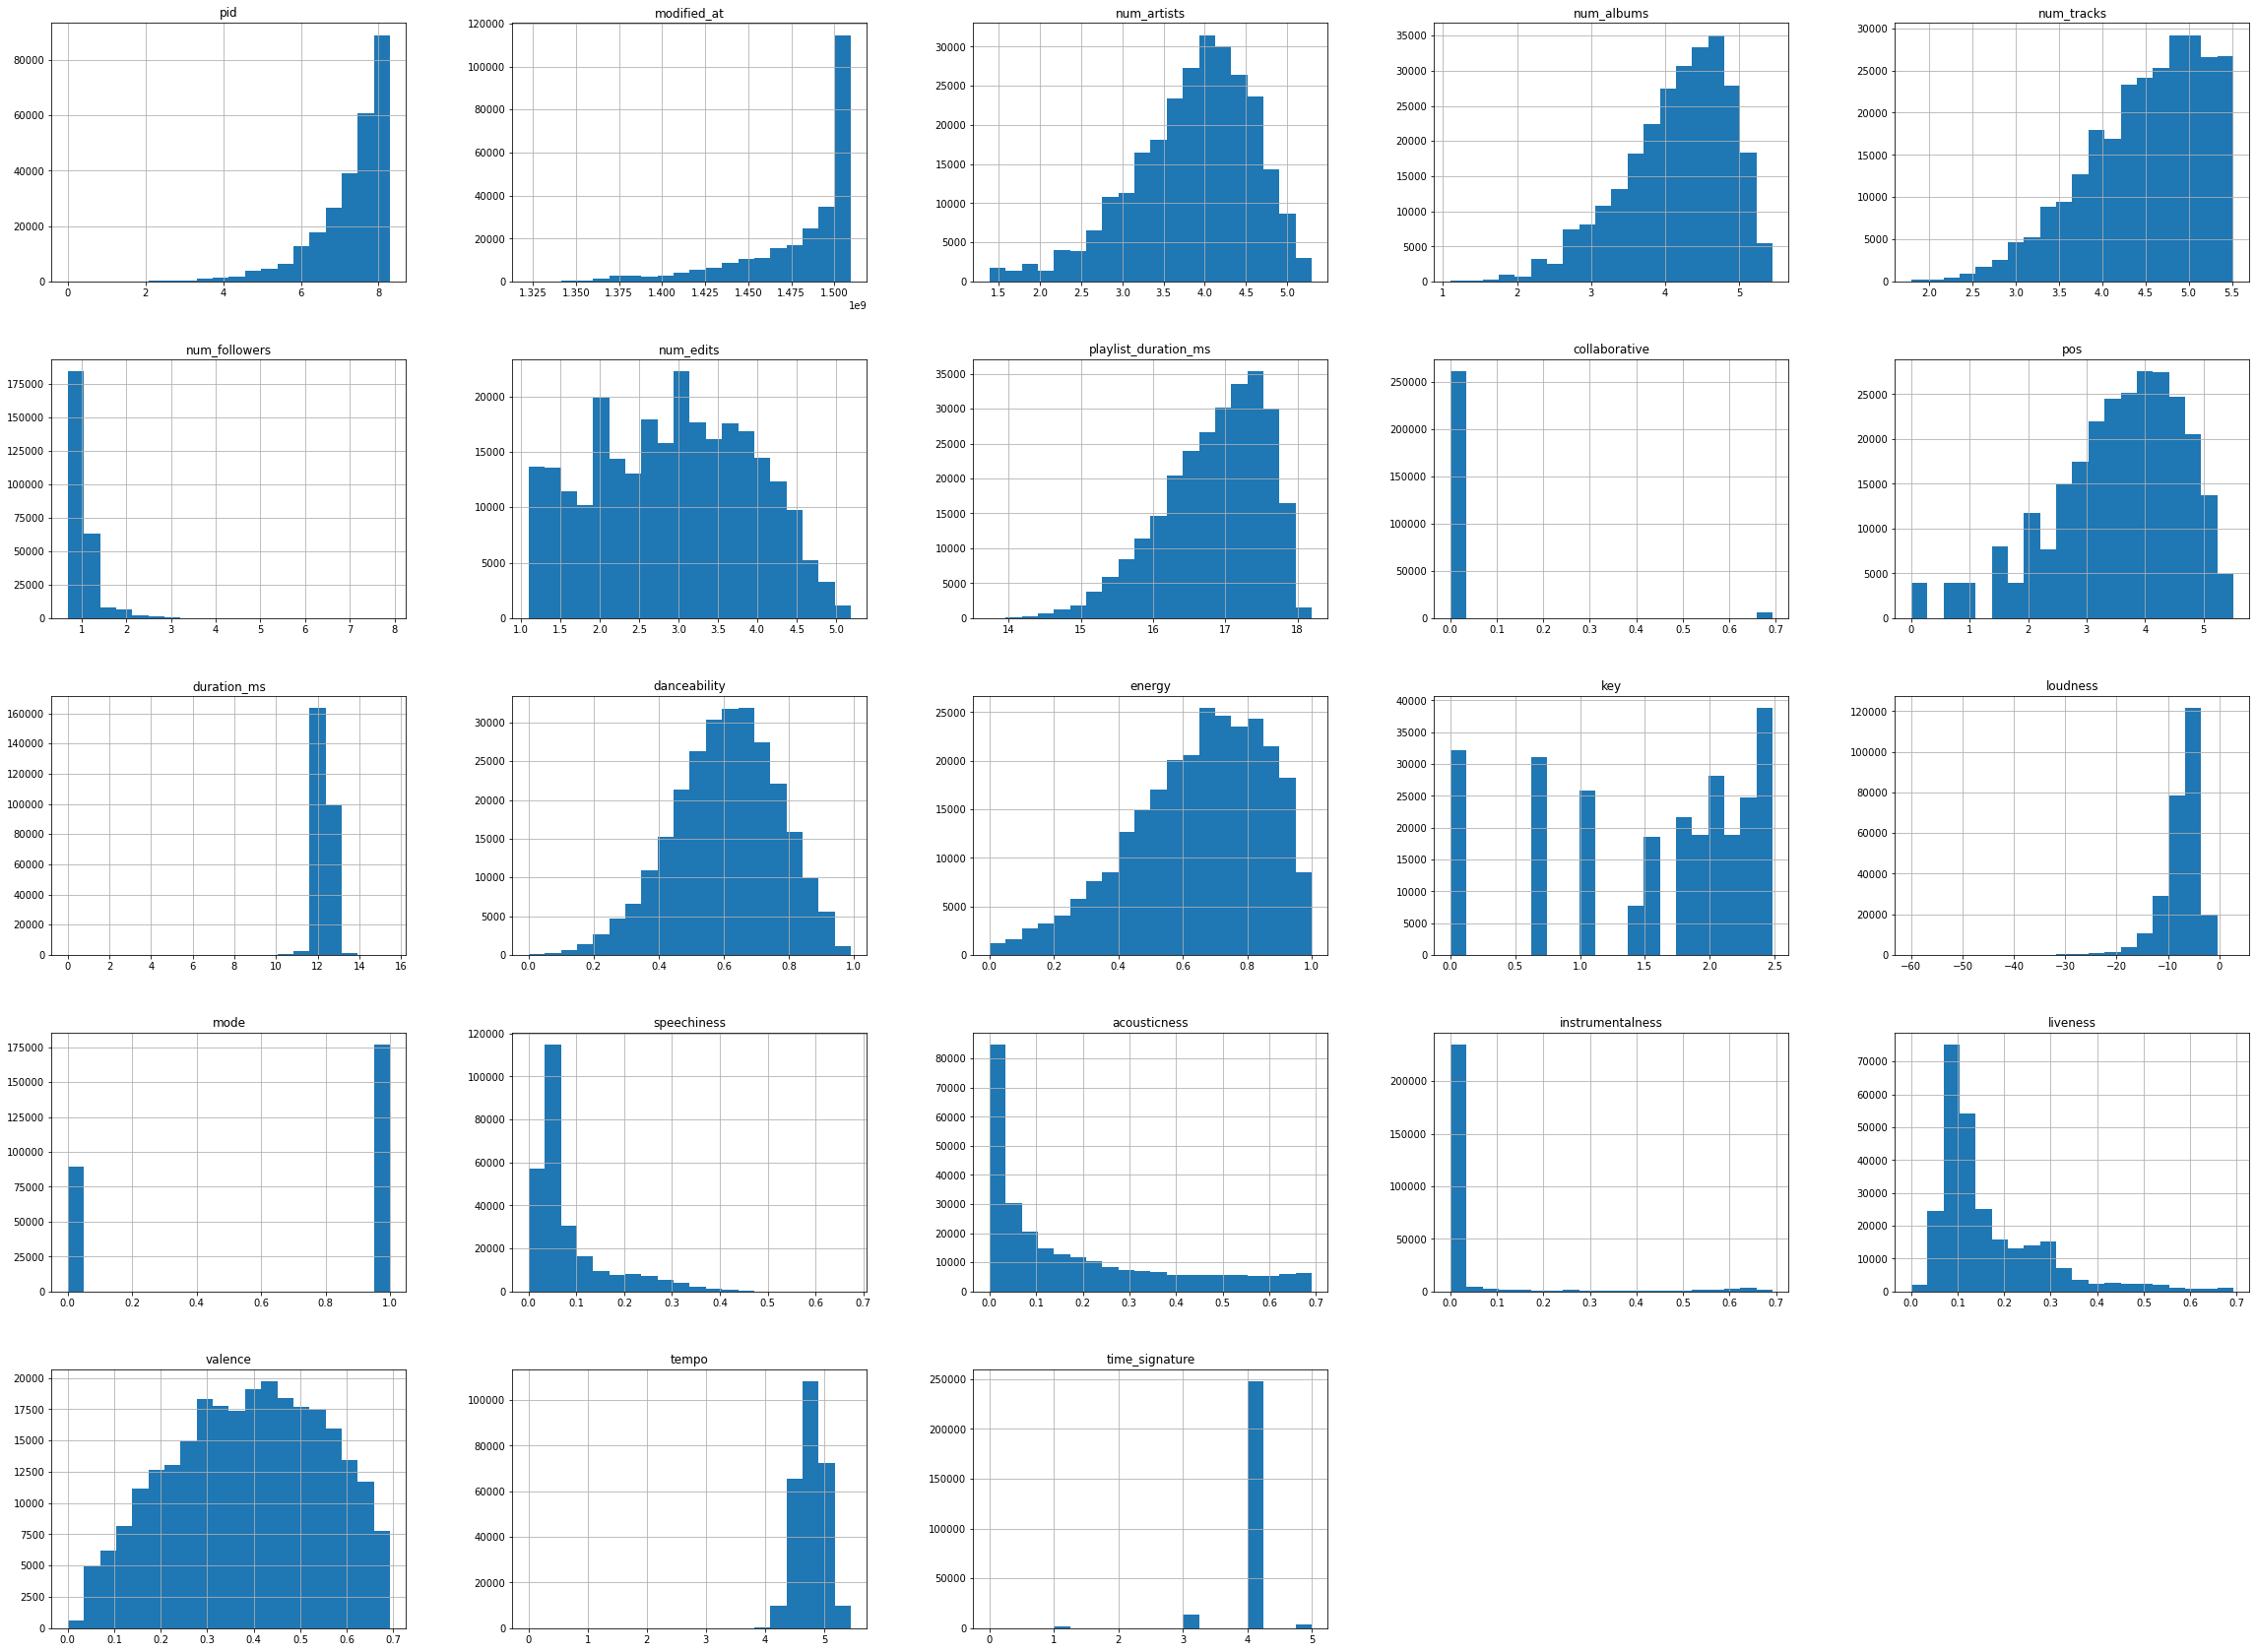

In [61]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_transformed[numerical_columns].hist(ax = ax, bins=20)

## 5.3 Apply Tukey’s box plot method to detect and winsorize outliers.<a name="5.3"></a>


Next to its visual benefits, the box plot provides useful statistics to identify individual observations as outliers. Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

While the inner (often confused with the whiskers) and outer fence are usually not shown on the actual box plot, they can be calculated using the interquartile range (IQR) like this:

**IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile**

**Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]**

**Outer fence = [Q1–3*IQR, Q3+3*IQR]**

**The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3**


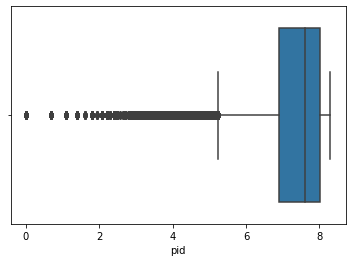

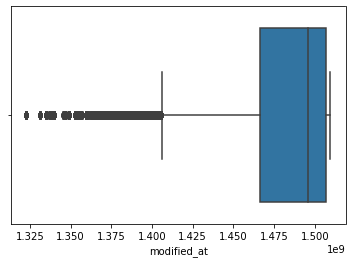

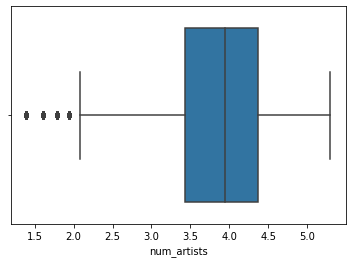

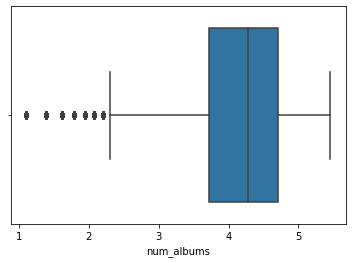

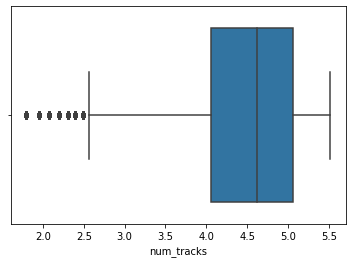

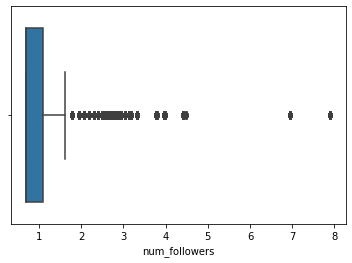

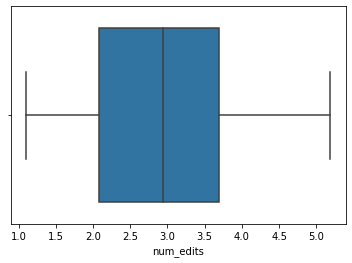

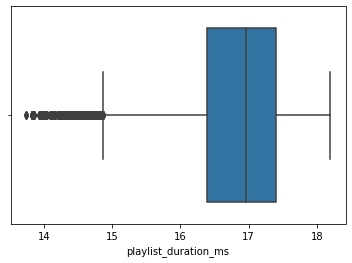

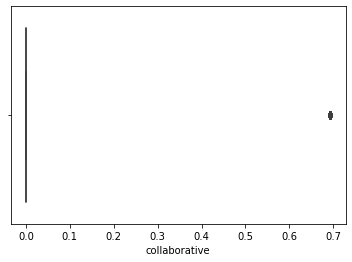

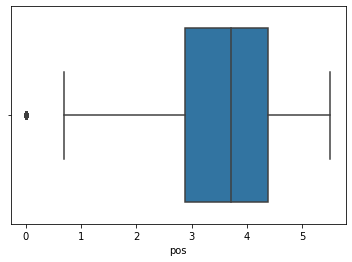

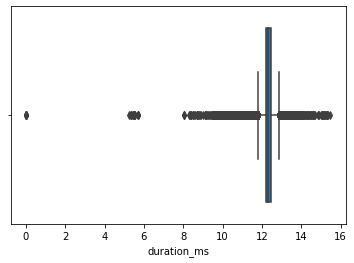

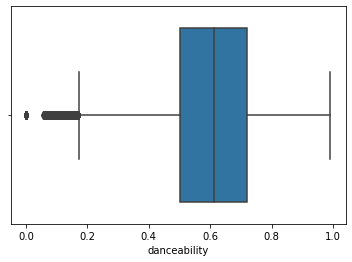

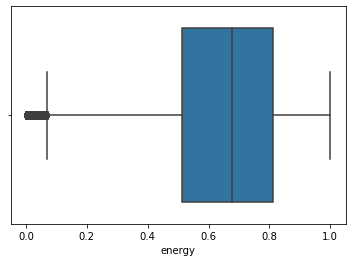

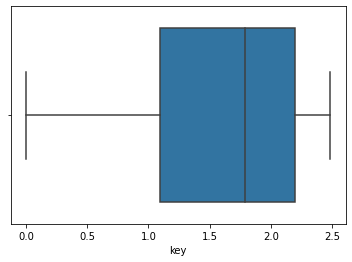

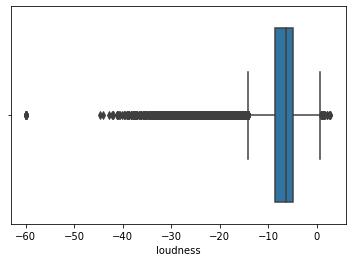

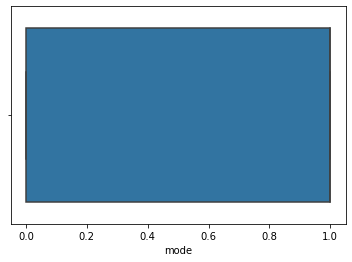

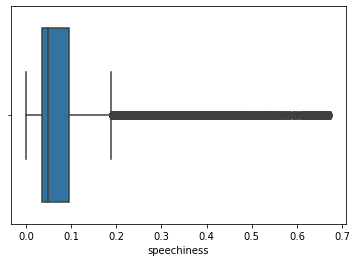

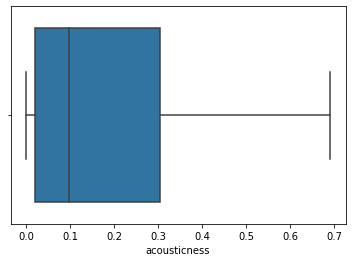

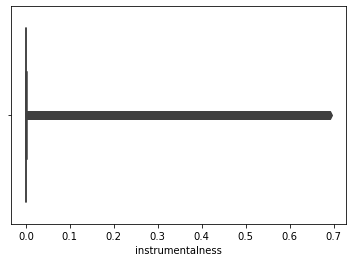

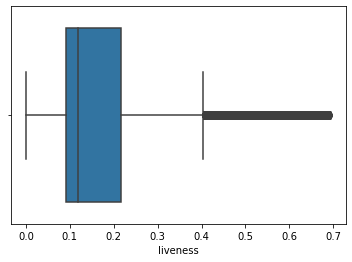

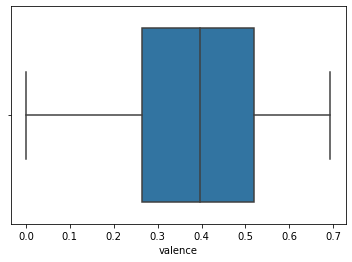

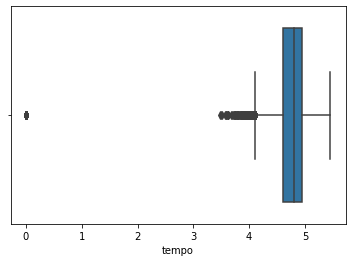

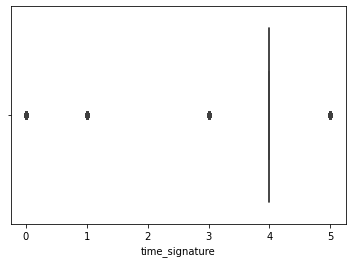

In [62]:
for col in numerical_columns:
    sns.boxplot(df_transformed[col])
    plt.show()

In [63]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [64]:
df_cleaned = remove_outliers(df_transformed, numerical_columns)
df_cleaned

<ipython-input-63-7365a3ef1dfc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
<ipython-input-63-7365a3ef1dfc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper
<ipython-input-63-7365a3ef1dfc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
<ipython-input-63-7365a3ef1dfc>:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,5.23,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,5.23,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.37,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,12.37,Love Is A Four Letter Word,0.65,0.63,2.08,-7.16,1,0.02,4.72e-02,0.00e+00,0.11,0.53,4.44,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.61,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,12.57,Galore - The Singles 1987-1997,0.46,0.74,2.30,-6.10,1,0.03,4.47e-03,1.83e-03,0.12,0.49,5.16,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-

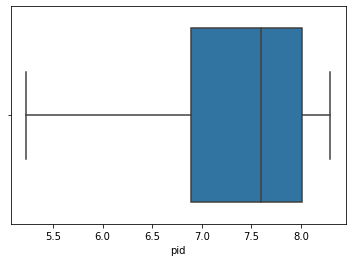

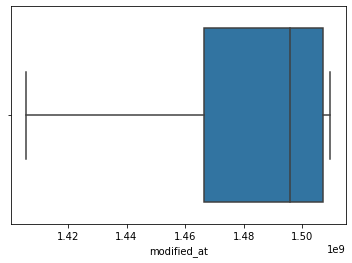

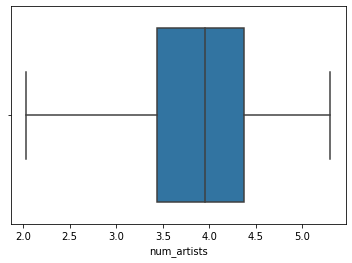

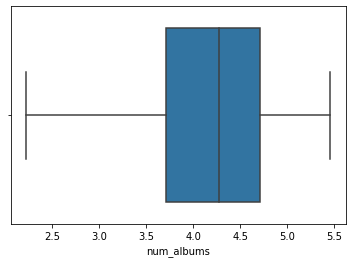

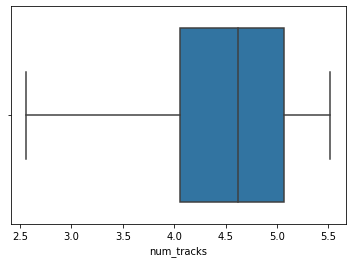

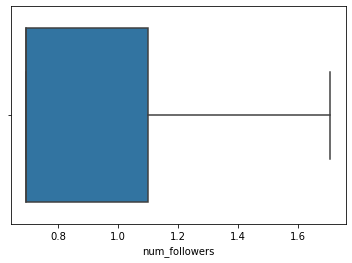

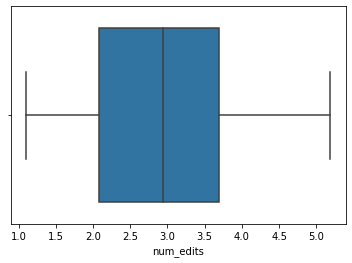

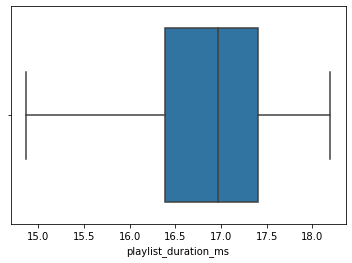

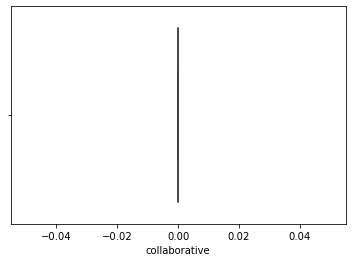

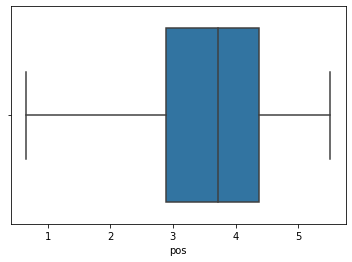

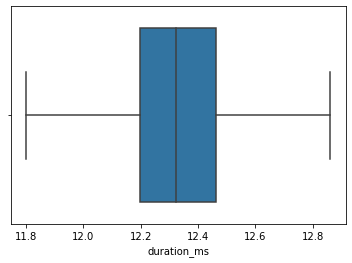

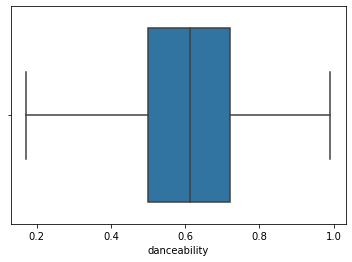

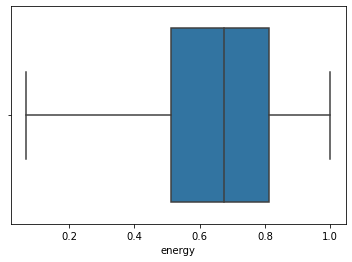

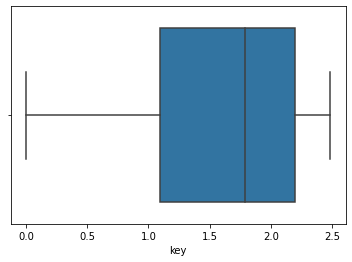

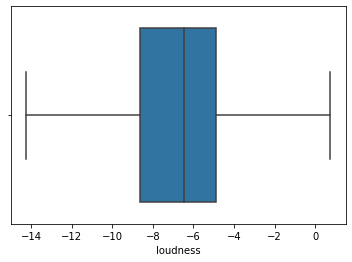

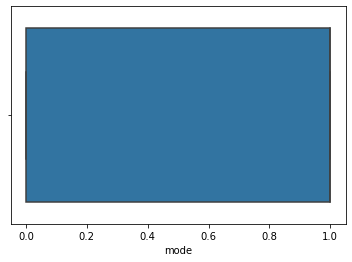

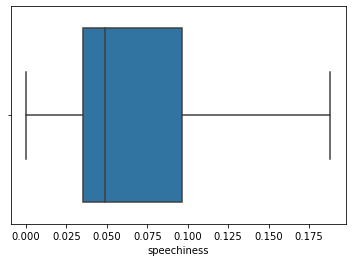

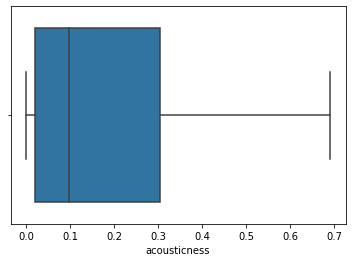

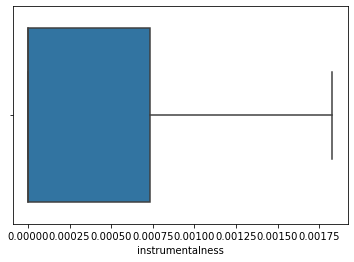

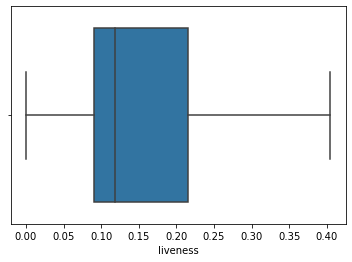

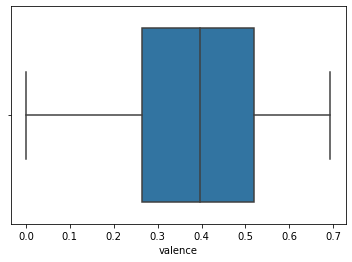

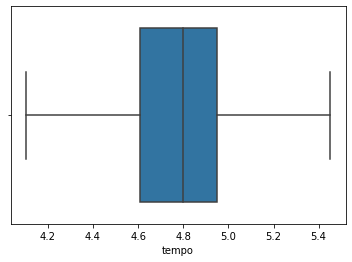

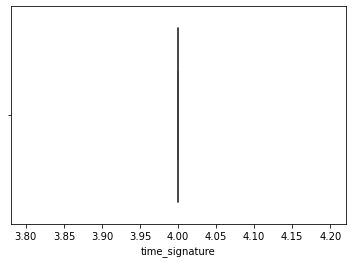

In [65]:
for col in numerical_columns:
    sns.boxplot(df_cleaned[col])
    plt.show()

## 5.4 Feature Scaling<a name="5.4"></a>

In [66]:
scaler = MinMaxScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns = df_cleaned[numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.00,0.85,0.49,0.51,0.48,0.0,0.21,0.42,0.0,0.00e+00,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0
1,0.00,0.92,0.95,0.99,1.00,0.0,0.54,0.89,0.0,7.51e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0
2,0.05,0.95,0.70,0.72,0.69,0.0,0.12,0.60,0.0,4.23e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0
3,0.20,0.66,0.82,0.81,0.87,0.0,0.41,0.82,0.0,6.39e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0
4,0.23,0.96,0.19,0.15,0.05,0.4,0.17,0.07,0.0,8.28e-03,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,5.58e-01,0.54,0.58,0.60,0.84,0.47,1.0,0.12,6.82e-02,0.0,0.28,0.77,0.25,0.0
266359,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.09e-01,0.73,0.35,0.73,0.93,0.54,1.0,0.17,6.47e-03,1.0,0.29,0.71,0.78,0.0
266360,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.14e-01,0.64,0.66,0.66,1.00,0.37,1.0,0.27,7.39e-02,1.0,0.15,0.83,0.32,0.0
266361,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.25e-01,0.58,0.68,0.67,0.93,0.46,1.0,0.19,2.03e-01,1.0,0.19,0.68,0.33,0.0


## 5.5 Create New Features by Features Interaction<a name="5.5"></a>

**I conducted sentiment analysis finding the polarity and subjectivity of the track name.**

- Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
- Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.
    
"The goal of the sentiment analysis is to extract additional features from the tracks.
By doing so, we can extract sentiment data other audio features via textual information.
For example, if the general mood of the song titles of a playlist is positive,
then this can be utilized to recommend positive songs. However, due to the short length of the titles,
the two metrics cannot produce optimal results."

In [67]:
df_new = df_scaled.copy()
happy = pd.Series(data = df_new['valence'], index = df_new['valence'].index, name='happy')
happy[happy>0.5] = 1
happy[happy<0.5] = 0
happy

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy, Length: 266363, dtype: float64

In [68]:
speech = pd.Series(data = df_new['speechiness'], index = df_new['speechiness'].index, name='speech')

speech[(speech1>=0.66)] = 1
speech[(speech1<0.66)] = 0
speech

NameError: name 'speech1' is not defined

In [ ]:
df_new = pd.concat([df_new, happy, speech], axis=1)
df_new

## 5.6 Drop Useless Features<a name="5.6"></a>

In [ ]:
df_new.nunique()

In [ ]:
df_new = df_new.drop(['collaborative', 'time_signature', 'pid', 'modified_at', 'pos'], axis=1)
df_new

In [ ]:
corr = df_new.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## 5.7 Use PCA for Dimensionality Reduction<a name="5.7"></a>

In [ ]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_new)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_new.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))